# Google ColabでDiscord botを動かすサンプル

In [ ]:
# discord.pyのインストール
!pip install -U discord.py

In [ ]:
# ランダムに表示したい選択肢のリスト
# ここではスプラトゥーン3のローラー一覧（2023年11月現在）
weapons = [
    'スプラローラー',
    'スプラローラーコラボ',
    'カーボンローラー',
    'カーボンローラーデコ',
    'ヴァリアブルローラー',
    'ダイナモローラー',
    'ダイナモローラーテスラ',
    'ワイドローラー',
    'ワイドローラーコラボ'
]

In [ ]:
# ユーザーのリスト
people = [
    'チューリップ',
    'ラベンダー',
    'サクラ',
    'アネモネ'
]

In [ ]:
# 使用するbotのトークン
TOKEN = 'YOUR_DISCORD_BOT_TOKEN'

In [ ]:
# ランダムでブキを選ぶ（重複あり）botの作成

import random
import discord
import nest_asyncio

# Colabで実行するのに必要
nest_asyncio.apply()

# ユーザー名とブキ名の間のコロンを揃えておく
def add_spaces(strings):
    max_length = max(len(s) for s in strings)
    return [s + '　' * (max_length - len(s)) if len(s) < max_length else s for s in strings]

people = add_spaces(people)

# botがスラッシュコマンドに反応してランダムにブキを選ぶようにする
# こちらの記事を参考
# https://qiita.com/Kodai0417/items/3abff9575e132e2955ec
intents = discord.Intents.default()
client = discord.Client(intents=intents)
tree = discord.app_commands.CommandTree(client)

async def format_selected_weapons(selected_weapons):
    return [f'・{people[i]}：{item}' for i, item in enumerate(selected_weapons)]

async def send_suggested_weapons(interaction, weapons_text):
    message = f'みんなのブキを選びました！\n{weapons_text}'
    await interaction.response.send_message(message)

async def select_weapons(required_quantity):
    return random.choices(weapons, k=required_quantity)

@tree.command(name='suggest',description='ランダムでブキを選ぶよ！')
async def suggest_command(interaction: discord.Interaction):
    number_of_people = len(people)
    selected_weapons = await select_weapons(number_of_people)
    selected_weapons_with_people = await format_selected_weapons(selected_weapons)
    weapons_text = '\n'.join(selected_weapons_with_people)
    await send_suggested_weapons(interaction, weapons_text)

client.run(TOKEN)

Discordのサーバーにbotを追加し、/suggestコマンドを実行した結果（一例）

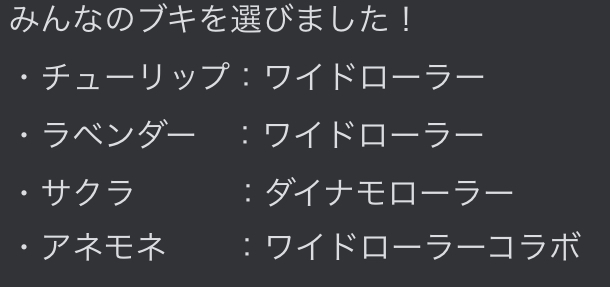